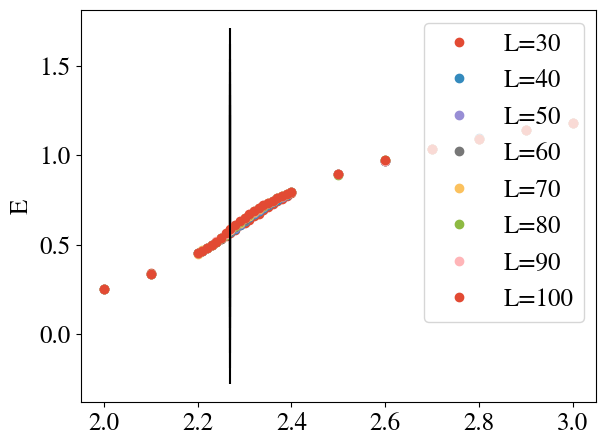

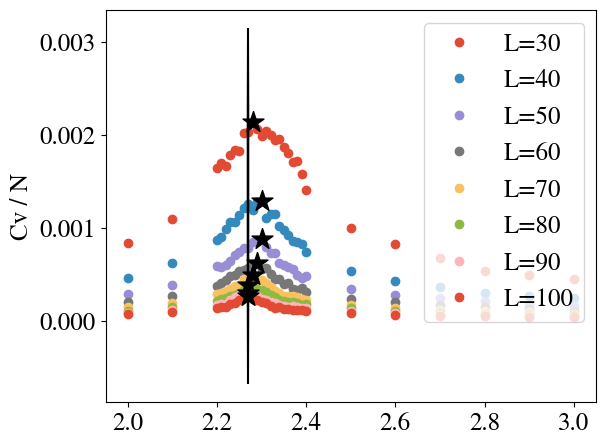

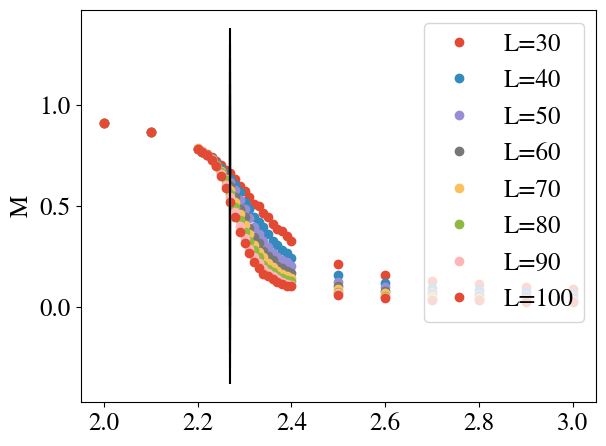

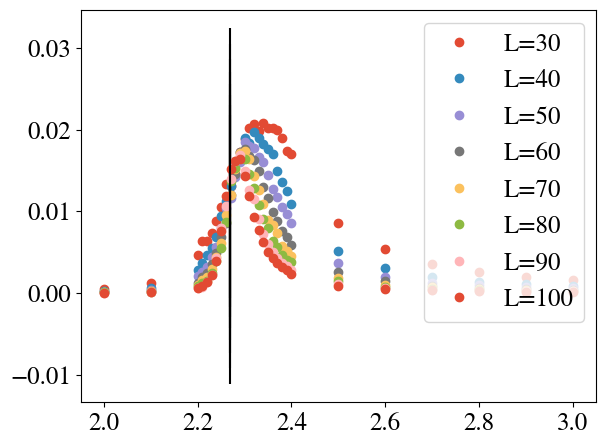

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numba

#for fancy plotting
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 18
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)

Tc = 2.269
E0 = - 2
resultsfolder = 'results/'
os.makedirs(resultsfolder,exist_ok=True)
eps = 1E-5
geometry = 'Ising-square'

L_list = [60,80,90,100]
L_list = np.arange(30,100+1,10,dtype=int)
figE,axE = plt.subplots(1)
figfE,axfE = plt.subplots(1)
figM,axM = plt.subplots(1)
figfM,axfM = plt.subplots(1)
start = 0
Tcs_Cv = np.zeros(shape=(len(L_list)))
# Tcs_Xi = np.zeros(shape=(len(L_list)))
for L_id,L in enumerate(L_list):
  T_list,E_mean,fE = np.loadtxt(resultsfolder + f'E_L{L}.txt',unpack=True)[:,start:]
  T_list,M_mean,fM = np.loadtxt(resultsfolder + f'M_L{L}.txt',unpack=True)[:,start:]
  fE /= (T_list**2 * L**2)
  fM /= T_list * L**2
  E_mean /= L**2
  M_mean /= L**2
  axE.plot(T_list,E_mean - E0,
           'o',
          #  label='E/N - E_0',
           label = f'{L=}',
           )
  axM.plot(T_list,M_mean,'o',
          #  label='M/N'
           label = f'{L=}',
           )
  axfE.plot(T_list,
          fE/L**2,
          'o',
          # label = r'$(\langle E^2 \rangle - \langle E \rangle^2)$',
          label = f'{L=}'
          )
  Tc_id = np.argmax(fE)
  Tcs_Cv[L_id] = T_list[Tc_id]
  axfE.scatter(T_list[Tc_id],fE[Tc_id]/L**2,marker='*',color='black',zorder=2,s=250)
  axfM.plot(T_list,
          fM/L**2,
          'o',
          # label = r'$(\langle M^2 \rangle - \langle M \rangle^2)$',
          label = f'{L=}'
          )
  # Tc_id = np.where(np.isclose(fE,np.max(fE)))[0][0]
  # plt.vlines(T_list[Tc_id],
  #            plt.ylim()[0],
  #            plt.ylim()[1],
  #            color='gray')
  # print(f'{T_list[Tc_id]=:.2f}')
  axfE.vlines(Tc,
             axfE.get_ylim()[0],
             axfE.get_ylim()[1],
             color='black')
  axfM.vlines(Tc,
             axfM.get_ylim()[0],
             axfM.get_ylim()[1],
             color='black')
  axE.vlines(Tc,
             axE.get_ylim()[0],
             axE.get_ylim()[1],
             color='black')
  axM.vlines(Tc,
             axM.get_ylim()[0],
             axM.get_ylim()[1],
             color='black')
  axE.legend()
  axfE.legend()
  axM.legend()
  axfM.legend()
  axE.set_ylabel('E')
  axM.set_ylabel('M')
  axfE.set_ylabel('Cv / N')
  

plt.show()
  # figE.savefig(fname=f'{resultsfolder}E.pdf')
  # figfE.savefig(fname=f'{resultsfolder}fE.pdf')
  # figM.savefig(fname=f'{resultsfolder}M.pdf')
  # figfM.savefig(fname=f'{resultsfolder}fM.pdf')


In [9]:
np.savetxt(fname=f'results/Tcs.txt',X=Tcs_Cv)